Accuracy: 79.21%


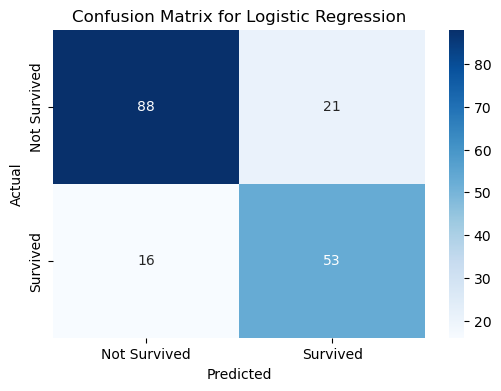

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\titanic.csv", index_col=0)

# 2. 결측치 처리
df.isnull().sum()
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Age 결측치 평균값으로 대체
df.dropna(subset=['Embarked'], inplace=True)  # Embarked의 결측치는 제거

# 3. 불필요한 컬럼 제거
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# 4. Sex 컬럼 인코딩 (Label Encoding)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 'male'은 0, 'female'은 1로 변환

# 5. 특성과 목표 변수 설정
X = df.drop('Survived', axis=1)  # 'Survived'를 제외한 나머지 특성들
y = df['Survived']  # 목표 변수인 'Survived'

# 6. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. LR 모델 학습
lr_model = LogisticRegression(random_state=42, max_iter=200)
lr_model.fit(X_train, y_train)

# 8. 예측
y_pred = lr_model.predict(X_test)

# 9. Accuracy 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 10. Confusion Matrix 확인
conf_matrix = confusion_matrix(y_test, y_pred)

# 11. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()